In [10]:
import one_good_pred_test as ogpt
import numpy as np 
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import random
import scipy
%matplotlib notebook

In [16]:
w = ogpt.generate_w()
X_test, y_test = ogpt.generate_data(w, num_samples=100)

# Run simulation
results = []
max_n = 1001
n_iter = 5#10

In [17]:
for n in range(0, max_n, 20):
    for i in range(n_iter):
        # Generate sample data
        X_train, y_train = ogpt.generate_data(w, var=n)

        # Measure MSE
        mse = ogpt.measure_mse(X_train, y_train, X_test, y_test)

        # Add to dataframe
        mse.insert(0, n)
        results.append(mse)

        print(n, i)


0 0
0 1
0 2
0 3
0 4
20 0
20 1
20 2
20 3
20 4
40 0
40 1
40 2
40 3
40 4
60 0
60 1
60 2
60 3
60 4
80 0
80 1
80 2
80 3
80 4
100 0
100 1
100 2
100 3
100 4
120 0
120 1
120 2
120 3
120 4
140 0
140 1
140 2
140 3
140 4
160 0
160 1
160 2
160 3
160 4
180 0
180 1
180 2
180 3
180 4
200 0
200 1
200 2
200 3
200 4
220 0
220 1
220 2
220 3
220 4
240 0
240 1
240 2
240 3
240 4
260 0
260 1
260 2
260 3
260 4
280 0
280 1
280 2
280 3
280 4
300 0
300 1
300 2
300 3
300 4
320 0
320 1
320 2
320 3
320 4
340 0
340 1
340 2
340 3
340 4
360 0
360 1
360 2
360 3
360 4
380 0
380 1
380 2
380 3
380 4
400 0
400 1
400 2
400 3
400 4
420 0
420 1
420 2
420 3
420 4
440 0
440 1
440 2
440 3
440 4
460 0
460 1
460 2
460 3
460 4
480 0
480 1
480 2
480 3
480 4
500 0
500 1
500 2
500 3
500 4
520 0
520 1
520 2
520 3
520 4
540 0
540 1
540 2
540 3
540 4
560 0
560 1
560 2
560 3
560 4
580 0
580 1
580 2
580 3
580 4
600 0
600 1
600 2
600 3
600 4
620 0
620 1
620 2
620 3
620 4
640 0
640 1
640 2
640 3
640 4
660 0
660 1
660 2
660 3
660 4
680 0
680 

In [18]:
# Convert to dataframe
columns = ["mae", "mse", "projection_axis", "projection_oblique"]
columns.insert(0, "n")
df = pd.DataFrame(results, columns=columns)
df = pd.melt(df, id_vars=['n'], value_vars=columns[1:], var_name='split', value_name='mse')
df["mse"]# /= df["n"]
df.head()

,n,split,mse
0,0,mae,231.542690
1,0,mae,230.047157
2,0,mae,230.587894
3,0,mae,233.603716
4,0,mae,230.913212


<IPython.core.display.Javascript object>


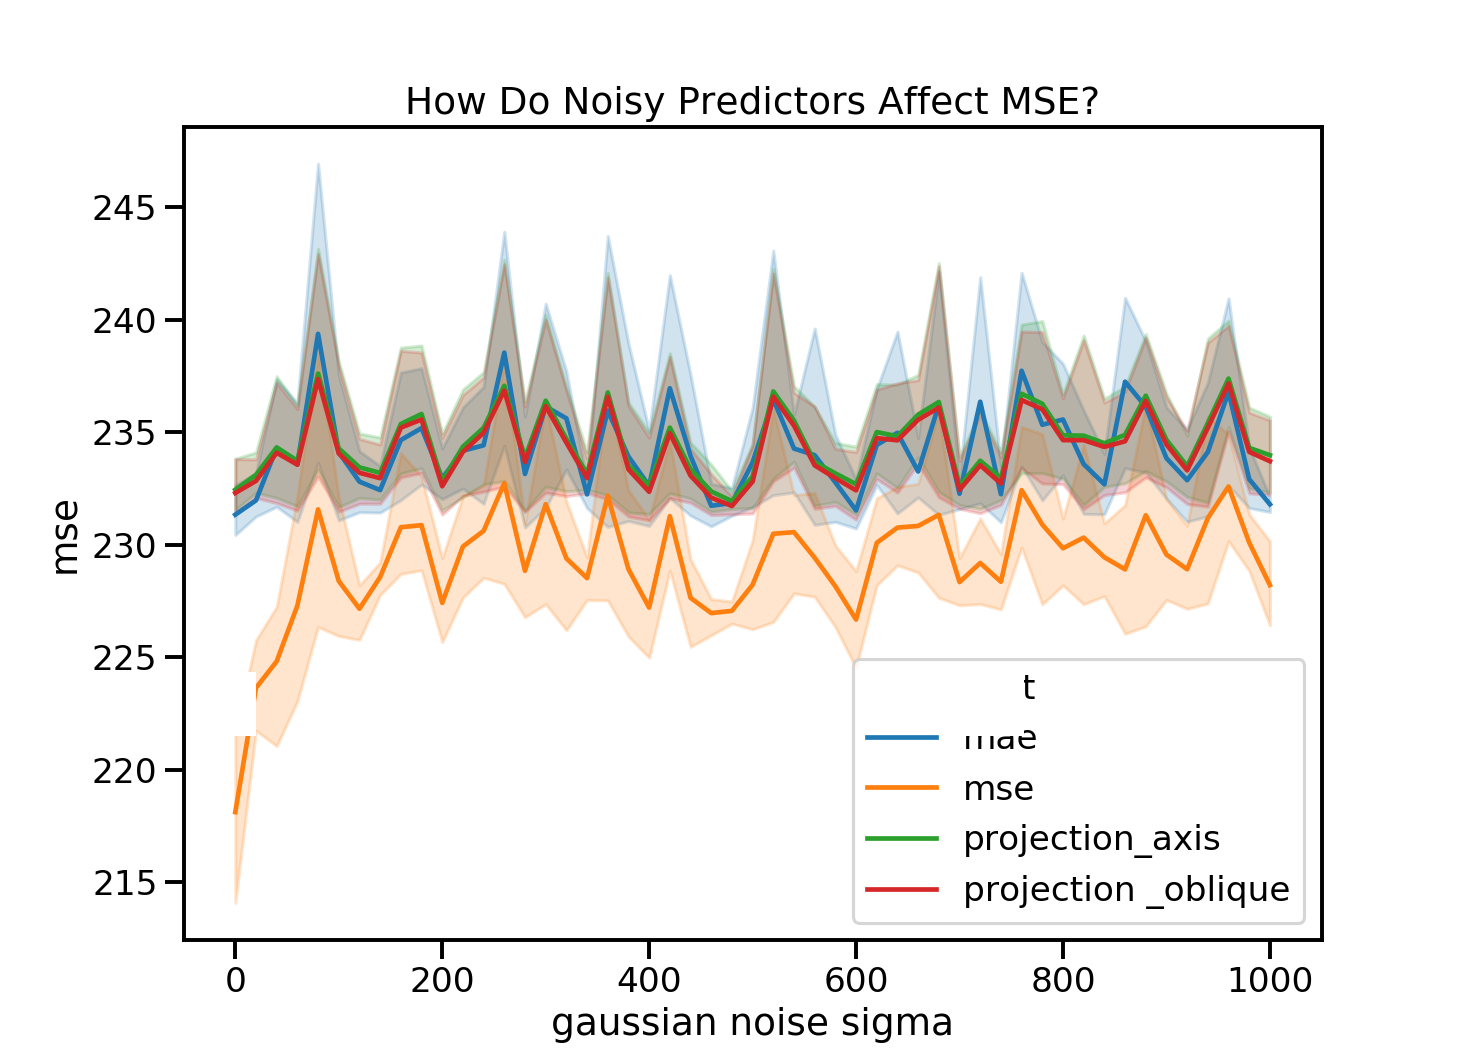

In [22]:
 with sns.plotting_context("talk", font_scale=1):
    f = sns.lineplot(x="n", y="mse", hue="split", data=df)
    f.set(xlabel="gaussian noise sigma", ylabel="mse")
    f.legend(loc='lower right')
    f.set_title("How Do Noisy Predictors Affect MSE?")
    plt.show()

In [23]:
df

,n,split,mse
0,0,mae,231.542690
1,0,mae,230.047157
2,0,mae,230.587894
3,0,mae,233.603716
4,0,mae,230.913212
...,...,...,...
1015,1000,projection _oblique,232.740779
1016,1000,projection _oblique,237.133624
1017,1000,projection _oblique,234.521116
1018,1000,projection _oblique,231.057915


In [27]:
w[w ==0].shape

(300,)

In [28]:
w.shape

(100, 10)